---
format:
  html:
    css: styles.css
    embed-resources: true
    fig-width: 9
    fig-height: 6
    html-math-method: katex
jupyter: python3
code-fold: true
code-overflow: wrap
---

# **Vectors and Matrices**

## **Vectors**

A vector is a mathematical object that possesses both magnitude (or length) and direction. This distinguishes it from a scalar, which has only magnitude.
Examples: velocity (speed and direction), force (strength and direction), displacement (distance and direction).

**Magnitude:** The magnitude of a vector is its length or size. It's a scalar quantity and is always non-negative. We denote the magnitude of a vector $\vec{v}$ as $||\vec{v}||$ or simply $v$.<br>
**Direction:** The direction of a vector indicates the line of action and sense of the vector. It can be specified using angles relative to a reference axis or by comparing it to another vector.<br>

### **Geometric Representation of Vectors in 2D and 3D**

**2D Representation:**
* In a two-dimensional plane (like the xy-plane), a vector is typically represented as an arrow.
* The tail of the arrow is the starting point (initial point), and the head of the arrow is the ending point (terminal point).
* The length of the arrow represents the magnitude of the vector.
* The orientation of the arrow represents the direction of the vector.
* Example: A vector representing a wind velocity of 10 m/s blowing northeast.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

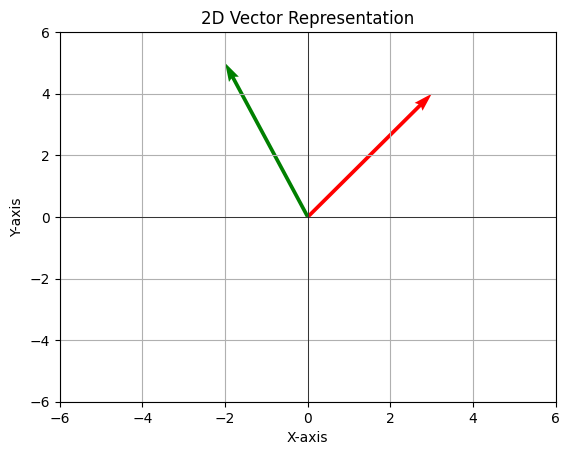

In [3]:
def plot_2d_vectors(vectors, colors=None):
    fig, ax = plt.subplots()
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid()
    
    for i, vec in enumerate(vectors):
        color = colors[i] if colors else 'blue'
        ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)
    
    max_val = np.max(np.abs(vectors)) + 1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('2D Vector Representation')
    plt.show()

vectors_2d = [np.array([3, 4]), np.array([-2, 5])]
plot_2d_vectors(vectors_2d, colors=['red', 'green'])

**3D Representation:**
* In three-dimensional space (like the xyz-space), vectors are still represented as arrows, but now they exist in a three-dimensional coordinate system.
* The concepts of magnitude and direction remain the same.
* Example: A vector representing the force acting on an object in 3D space.

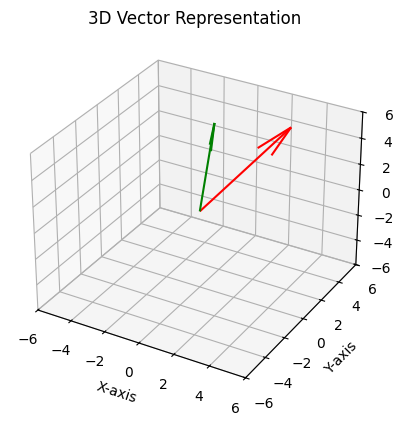

In [4]:
def plot_3d_vectors(vectors, colors=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(0, 0, 0, *zip(*vectors), color=colors if colors else 'blue')
    
    max_val = np.max(np.abs(vectors)) + 1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_zlim(-max_val, max_val)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Vector Representation')
    plt.show()

vectors_3d = [np.array([3, 4, 5]), np.array([-2, 5, 3])]
plot_3d_vectors(vectors_3d, colors=['red', 'green'])

**n-dimension vector**

The concept of vectors can be extended beyond 3d to any number of dimensions (n-dimensions). An n-dimensional vector has n components: $\vec{v} = \langle v_1, v_2, ..., v_n \rangle$.<br>
**Example:** Vectors are used to represent data points in high dimensional data sets.

**Component Form of Vectors (e.g., $v=⟨v1​,v2​,v3​⟩$).**

* **Component Form:**
    * Vectors can be expressed in component form, which is particularly useful for mathematical operations.
    * In 2D, a vector $\vec{v}$ can be written as $\vec{v} = \langle v_1, v_2 \rangle$, where $v_1$ and $v_2$ are the components of the vector along the x-axis and y-axis, respectively.
    * In 3D, a vector $\vec{v}$ can be written as $\vec{v} = \langle v_1, v_2, v_3 \rangle$, where $v_1$, $v_2$, and $v_3$ are the components along the x-axis, y-axis, and z-axis, respectively.
    * The components can be found by projecting the vector onto the coordinate axes.

**Example**: a vector that moves an object 2 units in the x direction, 3 units in the y direction, and -1 units in the z direction would be represented as $\vec{v} = \langle 2, 3, -1 \rangle$.

* **Magnitude in Component Form:**
    * The magnitude of a vector in component form can be calculated using the Pythagorean theorem:
        * In 2D: $||\vec{v}|| = \sqrt{v_1^2 + v_2^2}$
        * In 3D: $||\vec{v}|| = \sqrt{v_1^2 + v_2^2 + v_3^2}$

### **Types of Vectors**

#### **1. Based on Dimension & Space**  
- **Zero Vector (Null Vector)**: A vector with all components equal to zero.  
- **Unit Vector**: A vector with a magnitude of one.  
- **Position Vector**: A vector representing the position of a point relative to the origin.  
- **Displacement Vector**: Represents the change in position of an object.  

#### **2. Based on Direction & Magnitude**  
- **Collinear Vectors**: Vectors that lie along the same line or parallel lines.  
- **Coplanar Vectors**: Vectors that lie in the same plane.  
- **Equal Vectors**: Vectors that have the same magnitude and direction.  
- **Opposite Vectors (Negative Vectors)**: Vectors with the same magnitude but opposite direction.  

#### **3. Based on Mathematical Operations**  
- **Free Vector**: A vector that is independent of its initial position.  
- **Bound (Fixed) Vector**: A vector that is defined with a fixed starting point.  
- **Sliding Vector**: A vector that can be moved along its line of action without changing its effect. 

### **4. Based on Physical Context**  
- **Velocity Vector**: Represents the velocity of an object in a specific direction.  
- **Acceleration Vector**: Represents the rate of change of velocity.  
- **Force Vector**: Represents the force applied to an object in a specific direction.  
- **Momentum Vector**: Represents mass times velocity, indicating the motion of an object.  
- **Electric Field Vector**: Represents the electric field intensity at a point.  
- **Magnetic Field Vector**: Represents the direction and strength of a magnetic field.  

### **5. Based on Representation in Mathematics**  
- **Row Vector**: A vector represented as a single row of elements.  
- **Column Vector**: A vector represented as a single column of elements.  

### **6. Special Vectors in Higher Mathematics**  
- **Eigenvectors**: Vectors that remain in the same direction after a linear transformation.  
- **Gradient Vector**: Represents the rate and direction of change of a scalar field.  
- **Normal Vector**: A vector perpendicular to a surface or curve.  
- **Tangent Vector**: A vector that touches a curve at a single point and points in the direction of the curve. 

### Operations

Vector operations are fundamental in mathematics, physics, engineering, and computer science. Here are the main types of vector operations:

### **Basic Vector Operations**
1. **Vector Addition**  
   \[
   \mathbf{A} + \mathbf{B} = (A_x + B_x, A_y + B_y, A_z + B_z)
   \]
   - Performed component-wise.

2. **Vector Subtraction**  
   \[
   \mathbf{A} - \mathbf{B} = (A_x - B_x, A_y - B_y, A_z - B_z)
   \]
   - Similar to addition but subtracts components.

3. **Scalar Multiplication**  
   \[
   k\mathbf{A} = (kA_x, kA_y, kA_z)
   \]
   - Scales the vector by a constant factor.

### **Dot Product (Scalar Product)**
4. **Dot Product**  
   \[
   \mathbf{A} \cdot \mathbf{B} = A_x B_x + A_y B_y + A_z B_z
   \]
   - Can also be expressed as:
   \[
   \mathbf{A} \cdot \mathbf{B} = |\mathbf{A}| |\mathbf{B}| \cos\theta
   \]
   - Produces a scalar value.
   - Used to determine the angle between vectors.

### **Cross Product (Vector Product)**
5. **Cross Product**  
   \[
   \mathbf{A} \times \mathbf{B} =
   \begin{vmatrix}
   \mathbf{i} & \mathbf{j} & \mathbf{k} \\
   A_x & A_y & A_z \\
   B_x & B_y & B_z
   \end{vmatrix}
   \]
   - Produces a new vector perpendicular to both \(\mathbf{A}\) and \(\mathbf{B}\).
   - Magnitude:
     \[
     |\mathbf{A} \times \mathbf{B}| = |\mathbf{A}| |\mathbf{B}| \sin\theta
     \]
   - Used in torque, angular momentum, and physics applications.

### **Vector Projection**
6. **Projection of \(\mathbf{A}\) onto \(\mathbf{B}\)**  
   - Scalar projection:
     \[
     \text{proj}_{\mathbf{B}} \mathbf{A} = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|}
     \]
   - Vector projection:
     \[
     \text{Proj}_{\mathbf{B}} \mathbf{A} = \left( \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{B}|^2} \right) \mathbf{B}
     \]

### **Vector Magnitude & Unit Vector**
7. **Magnitude (Norm) of a Vector**  
   \[
   |\mathbf{A}| = \sqrt{A_x^2 + A_y^2 + A_z^2}
   \]
   - Represents the length of the vector.

8. **Unit Vector**  
   \[
   \hat{\mathbf{A}} = \frac{\mathbf{A}}{|\mathbf{A}|}
   \]
   - A vector of magnitude 1 in the same direction as \(\mathbf{A}\).

### **Advanced Vector Operations**
9. **Gradient (Vector Calculus)**
   \[
   \nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right)
   \]
   - Represents the rate of change of a scalar field.

10. **Divergence**
   \[
   \nabla \cdot \mathbf{A} = \frac{\partial A_x}{\partial x} + \frac{\partial A_y}{\partial y} + \frac{\partial A_z}{\partial z}
   \]
   - Measures the "spreading out" of a vector field.

11. **Curl**
   \[
   \nabla \times \mathbf{A} =
   \begin{vmatrix}
   \mathbf{i} & \mathbf{j} & \mathbf{k} \\
   \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
   A_x & A_y & A_z
   \end{vmatrix}
   \]
   - Measures the rotational tendency of a vector field.

12. **Laplacian**
   \[
   \nabla^2 f = \nabla \cdot \nabla f
   \]
   - A second-order differential operator used in physics and engineering.

### **Transformations & Applications**
13. **Rotation of Vectors** (Matrix multiplication)
   - A vector \(\mathbf{A}\) can be rotated using a transformation matrix.

14. **Vector Integration**
   - Used to compute work done by a force field.

15. **Vector Differentiation**
   - Measures the rate of change of vector functions.

### Vector Space

## Matrices

### Basic Concepts

### Types of Matrix

### Matrix Operations